# IOM Missing Migrants Challenge

## Introduction
**Brief overview of the dataset and its context:**

   The dataset provided by the Missing Migrants Project tracks the deaths of migrants, including refugees and asylum-seekers, who have perished or gone missing during the process of migration towards international destinations. It spans the years from 2014 to 2024, encompassing significant periods of global migration activity. It's important to note that   these data represent minimum estimates, as many migrant deaths during migration remain unrecorded. The dataset includes information on attempted crossings of the Mediterranean  Sea from 2016 to 2024, detailing arrivals in Europe, interceptions by North African and Turkish Coast Guards, as well as migrant deaths and disappearances.

**Objectives of the analysis:**
1. Understanding Migration Patterns: Analyze trends in migrant deaths, arrivals in Europe, and interceptions by authorities to understand migration dynamics, especially in the Mediterranean.

2. Identifying Risk Factors: Identify factors contributing to migrant deaths, such as routes, seasons, and demographics, to inform risk reduction strategies.

3. Informing Policy and Intervention: Provide insights for policy-makers and intervention efforts to improve migration management and protect vulnerable migrants.

4. Raising Awareness: Highlight the human toll of irregular migration and advocate for international cooperation and humanitarian responses to address migrant safety.

* Running on Anaconda3 (Python 3.11.5)

## 1. Initial Data Exploration

### 1.0 Installing the necessary Libraries

In [2]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install ipython
!pip install scikit-learn
!pip install mglearn
!pip install seaborn
!pip install sklearn
!pip install geopandas
!pip install shapely
!pip install sweetviz
!pip install pycountry
!pip install xgboost
!pip install bayesian-optimization
!pip install geotext

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

### 1.1 Loading the necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

# Visualization
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

import random
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.offline as offline
import plotly.graph_objs as go

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC, LinearSVC
from scipy.optimize import minimize
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, train_test_split
from xgboost import XGBClassifier

#Feature Engineering
from geotext import GeoText

import warnings
warnings.filterwarnings('ignore')
import os

In [4]:
# Space to import any additional libraries

### 1.2 Loading the Raw Data for EDA & Data Processing

In [5]:
df_raw = pd.read_csv('data/Missing_Migrants_Global_Figures_allData.csv')

### 1.3 Initial Inspection 

In [6]:
df_raw.head()

,Main ID,Incident ID,Incident Type,Region of Incident,Incident Date,Incident Year,Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Region of Origin,Cause of Death,Country of Incident,Migration Route,Location of Incident,Coordinates,UNSD Geographical Grouping,Information Source,URL,Source Quality
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,...,Central America,Mixed or unknown,United States of America,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"31.650259, -110.366453",Northern America,Pima County Office of the Medical Examiner (PC...,http://humaneborders.info/,5
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,...,Latin America / Caribbean (P),Mixed or unknown,United States of America,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"31.59713, -111.73756",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,NaN,1,...,Latin America / Caribbean (P),Mixed or unknown,United States of America,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"31.94026, -113.01125",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,NaN,1,...,Central America,Violence,United States of America,US-Mexico border crossing,"near Douglas, Arizona, USA","31.506777, -109.315632",Northern America,"Ministry of Foreign Affairs Mexico, Pima Count...",http://bit.ly/1qfIw00,5
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,0.0,1,...,Northern Africa,Harsh environmental conditions / lack of adequ...,Russian Federation,NaN,Border between Russia and Estonia,"59.1551, 28",Northern Europe,EUBusiness (Agence France-Presse),http://bit.ly/1rTFTjR,1


In [7]:
df_raw.shape

(15927, 25)

### 1.4 Data Preparation and Cleaning

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15927 entries, 0 to 15926
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              15927 non-null  object 
 1   Incident ID                          15927 non-null  object 
 2   Incident Type                        15927 non-null  object 
 3   Region of Incident                   15927 non-null  object 
 4   Incident Date                        15912 non-null  object 
 5   Incident Year                        15927 non-null  int64  
 6   Month                                15927 non-null  object 
 7   Number of Dead                       15133 non-null  float64
 8   Minimum Estimated Number of Missing  1592 non-null   float64
 9   Total Number of Dead and Missing     15927 non-null  int64  
 10  Number of Survivors                  2540 non-null   float64
 11  Number of Females           

- We can see that the data has 15927 rows and 25 columns.

### 1.4.1 Finding Duplicates in the Dataset 

In [9]:
df_raw.duplicated().sum()

0

### 1.4.2 Feature Preprocessing
* The Coordinates variable has comma-separated longitudes and latitudes. The next cell separates them into 2 columns. 

In [10]:
df_raw[['lat', 'lon']] = df_raw['Coordinates'].str.split(',', expand=True)
df_raw['lat'] = pd.to_numeric(df_raw['lat'], errors='coerce')
df_raw['lon'] = pd.to_numeric(df_raw['lon'], errors='coerce')

### 1.4.3 Identifying and Handling Missing Values

In [11]:
df_raw.isna().sum()

Main ID                                    0
Incident ID                                0
Incident Type                              0
Region of Incident                         0
Incident Date                             15
Incident Year                              0
Month                                      0
Number of Dead                           794
Minimum Estimated Number of Missing    14335
Total Number of Dead and Missing           0
Number of Survivors                    13387
Number of Females                      11951
Number of Males                         5732
Number of Children                     13104
Country of Origin                          8
Region of Origin                           1
Cause of Death                             0
Country of Incident                        0
Migration Route                         2478
Location of Incident                       0
Coordinates                                1
UNSD Geographical Grouping                 1
Informatio

- There are some variables with a high number of missing data in the columns.

* Removing the columns with more than 50% missing data. 

In [12]:
threshold = len(df_raw) * 0.5
df_clean = df_raw.dropna(thresh=threshold, axis=1)
df_clean.isna().sum()

Main ID                                0
Incident ID                            0
Incident Type                          0
Region of Incident                     0
Incident Date                         15
Incident Year                          0
Month                                  0
Number of Dead                       794
Total Number of Dead and Missing       0
Number of Males                     5732
Country of Origin                      8
Region of Origin                       1
Cause of Death                         0
Country of Incident                    0
Migration Route                     2478
Location of Incident                   0
Coordinates                            1
UNSD Geographical Grouping             1
Information Source                    13
URL                                 5644
Source Quality                         0
lat                                    1
lon                                    1
dtype: int64

* Saving the clean dataset to a csv file. 

In [13]:
df_clean.to_csv('df_clean.csv', index=False)

## 2. Exploratory Data Analysis (EDA)

## 2.1 Descriptive Statistics: Numerical Columns

In [14]:
numerical_columns = df_clean.select_dtypes(include=['number'])

descriptive_stats = numerical_columns.describe()

print("Descriptive statistics for numerical columns:")
print(descriptive_stats)


Descriptive statistics for numerical columns:
       Incident Year  Number of Dead  Total Number of Dead and Missing  \
count   15927.000000    15133.000000                      15927.000000   
mean     2019.596471        2.463292                          4.041627   
std         2.718991        9.195676                         18.301790   
min      2014.000000        0.000000                          0.000000   
25%      2017.000000        1.000000                          1.000000   
50%      2020.000000        1.000000                          1.000000   
75%      2022.000000        2.000000                          2.000000   
max      2024.000000      750.000000                       1022.000000   

       Number of Males  Source Quality           lat           lon  
count     10195.000000    15927.000000  15926.000000  15926.000000  
mean          1.683865        3.369875     27.553837    -14.832018  
std           4.338463        1.335102     10.926747     65.267072  
min        

## 2.1 Frequency Counts: Categorical Columns

In [15]:
columns_to_check = ['Incident Type', 'Region of Incident', 'Incident Date', 'Incident Year', 'Month',
                    'Country of Origin', 'Region of Origin', 'Cause of Death', 'Country of Incident',
                    'Migration Route', 'Location of Incident', 'UNSD Geographical Grouping']

for column in columns_to_check:
    counts = df_clean[column].value_counts().head(5)
    print(f"Top 5 most frequent values for {column}:")
    print(counts)
    print()

Top 5 most frequent values for Incident Type:
Incident Type
Incident                   15126
Split Incident               709
Cumulative Incident           91
Incident,Split Incident        1
Name: count, dtype: int64

Top 5 most frequent values for Region of Incident:
Region of Incident
North America      3229
Southern Asia      2759
Mediterranean      2483
Northern Africa    2190
Central America    1678
Name: count, dtype: int64

Top 5 most frequent values for Incident Date:
Incident Date
2016-03-20    27
2016-07-31    20
2016-02-21    20
2022-09-22    19
2023-08-21    19
Name: count, dtype: int64

Top 5 most frequent values for Incident Year:
Incident Year
2023    2651
2022    2302
2021    1889
2019    1825
2018    1669
Name: count, dtype: int64

Top 5 most frequent values for Month:
Month
October      1543
August       1527
September    1518
July         1468
June         1415
Name: count, dtype: int64

Top 5 most frequent values for Country of Origin:
Country of Origin
Unknown    

## 2.2 Visualisation

### 2.2.1 Bar Chart Report

In [16]:
import sweetviz as sv
sweet_report = sv.analyze(pd.read_csv('data/df_clean.csv'))

#Saving results to HTML file
sweet_report.show_html('EDA_automated.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_automated.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


*Sweetviz performs comprehensive analysis and visualization of datasets, including:*

- Target Analysis: Examining how a target variable relates to other features.
- Visualizing and Comparing: Comparing distinct datasets and intra-set characteristics.
- Mixed-Type Associations: Integrating associations seamlessly for numerical, categorical, and mixed-type data.
- Type Inference: Automatically detecting data types and providing manual overrides.
- Summary Information: Presenting type, unique values, missing values, duplicates, and most frequent values.
- Numerical Analysis: Providing statistics like min/max, quartiles, mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, and skewness.

### 2.2.2 Plotting the Numerical Data

- Let's divide the columns into categorical and numerical 

In [17]:
categorical_cols = []
numerical_cols = []

for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

print('Categorical Columns:', categorical_cols)
print('Numerical Columns:', numerical_cols)


Categorical Columns: ['Main ID', 'Incident ID', 'Incident Type', 'Region of Incident', 'Incident Date', 'Month', 'Country of Origin', 'Region of Origin', 'Cause of Death', 'Country of Incident', 'Migration Route', 'Location of Incident', 'Coordinates', 'UNSD Geographical Grouping', 'Information Source', 'URL']
Numerical Columns: ['Incident Year', 'Number of Dead', 'Total Number of Dead and Missing', 'Number of Males', 'Source Quality', 'lat', 'lon']


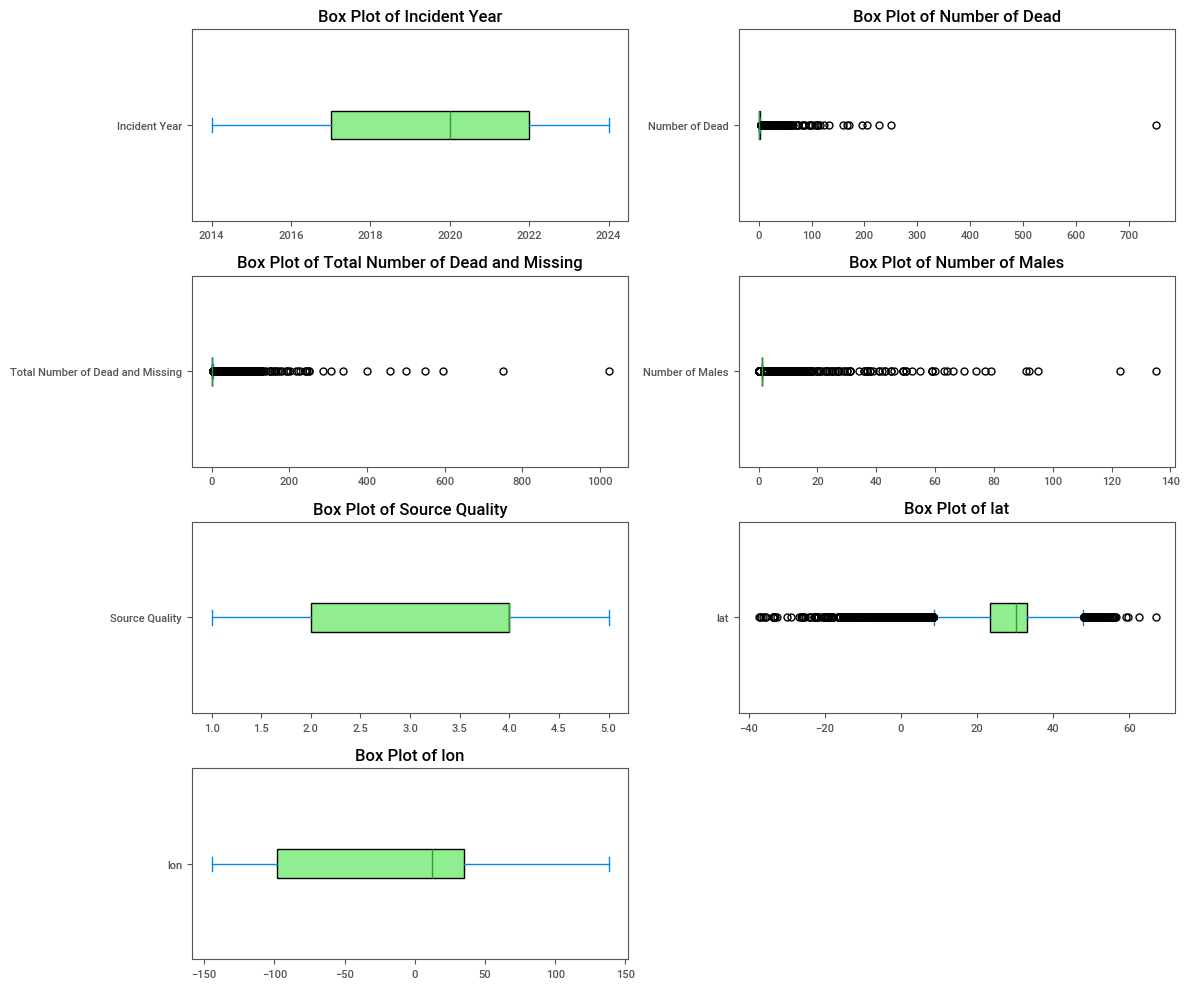

In [18]:
# Plot histograms and box plots for each numerical column
fig, axes = plt.subplots(4, 2, figsize=(12, 10))  # Adjusted figure size for better spacing
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    # Plot box plot
    df_clean[col].plot.box(ax=axes[i], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'), flierprops=dict(marker='o', markersize=5))  # Adjusted box plot appearance
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel("")  # Removed y-label from box plot for consistency

# Hide empty subplots
for i in range(len(numerical_cols), 4 * 2):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### 2.2.3 Geographical Distribution of Incidents

*Geographical Distribution of Incidents by Country*

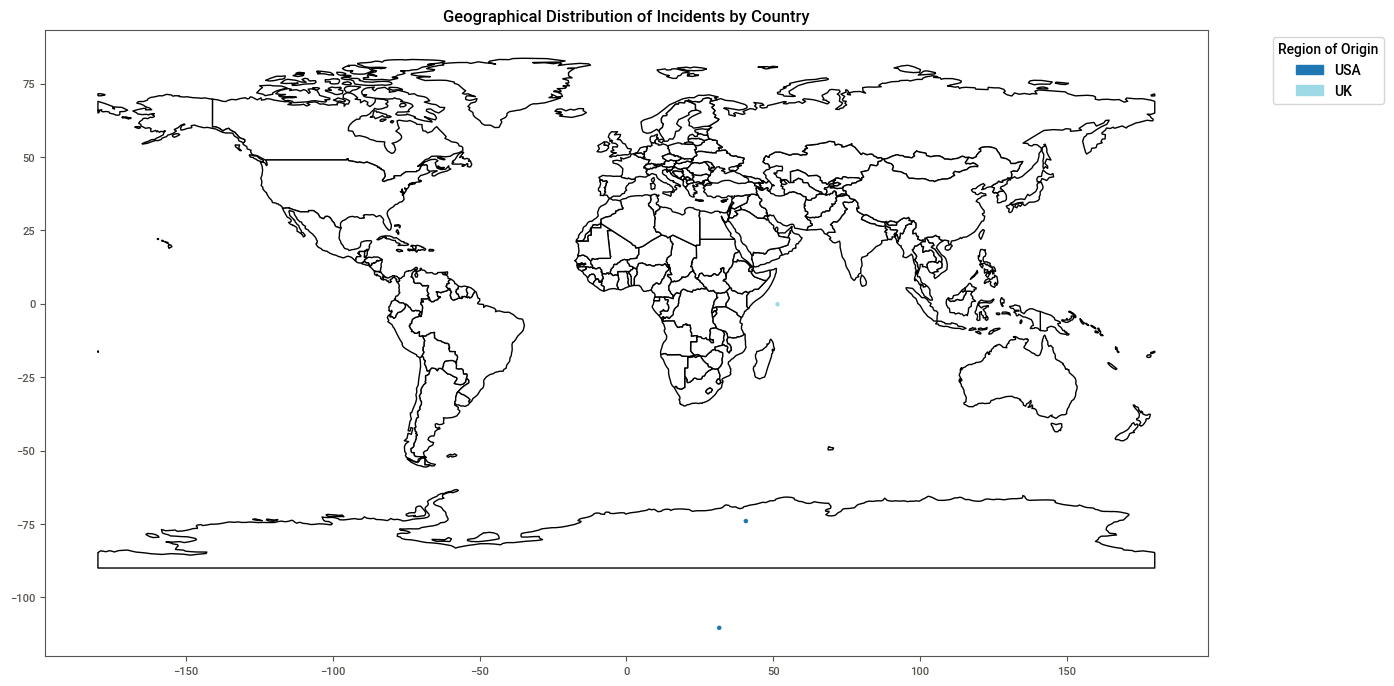

In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.wkt import loads
import matplotlib.patches as mpatches

# Sample data frame with a 'Coordinates' column containing WKT formatted strings
data = {'Coordinates': ['POINT(31.650259 -110.366453)', 'POINT(40.712776 -74.005974)', 'POINT(51.507351 -0.127758)'],
        'Region of Origin': ['USA', 'USA', 'UK']}
df_clean = pd.DataFrame(data)

# Function to convert existing WKT formatted strings to Shapely geometries
def convert_to_geometry(wkt_string):
    return loads(wkt_string) if wkt_string is not None else None

# Convert 'Coordinates' column to Shapely geometries
df_clean['geometry'] = df_clean['Coordinates'].apply(convert_to_geometry)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_clean, geometry='geometry')

# Generate a unique color for each country using a categorical palette
num_unique_countries = gdf['Region of Origin'].nunique()
colors = plt.cm.get_cmap('tab20', num_unique_countries)  # Use a color map that can provide enough distinct colors

# Map each country to a color
country_colors = {country: colors(i) for i, country in enumerate(gdf['Region of Origin'].unique())}
gdf['color'] = gdf['Region of Origin'].map(country_colors)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, markersize=5, color=gdf['color'])

# Create a legend
legend_labels = [mpatches.Patch(color=color, label=country) for country, color in country_colors.items()]
plt.legend(handles=legend_labels, title='Region of Origin', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Geographical Distribution of Incidents by Country')
plt.show()


- The main regions where there are missing migrants are in Southern Asia, Latin America / Caribbean and Central America

*Total Number of Dead and Missing by Region of Incident*

In [20]:
df_clean

,Coordinates,Region of Origin,geometry
0,POINT(31.650259 -110.366453),USA,POINT (31.650259 -110.366453)
1,POINT(40.712776 -74.005974),USA,POINT (40.712776 -74.005974)
2,POINT(51.507351 -0.127758),UK,POINT (51.507351 -0.127758)


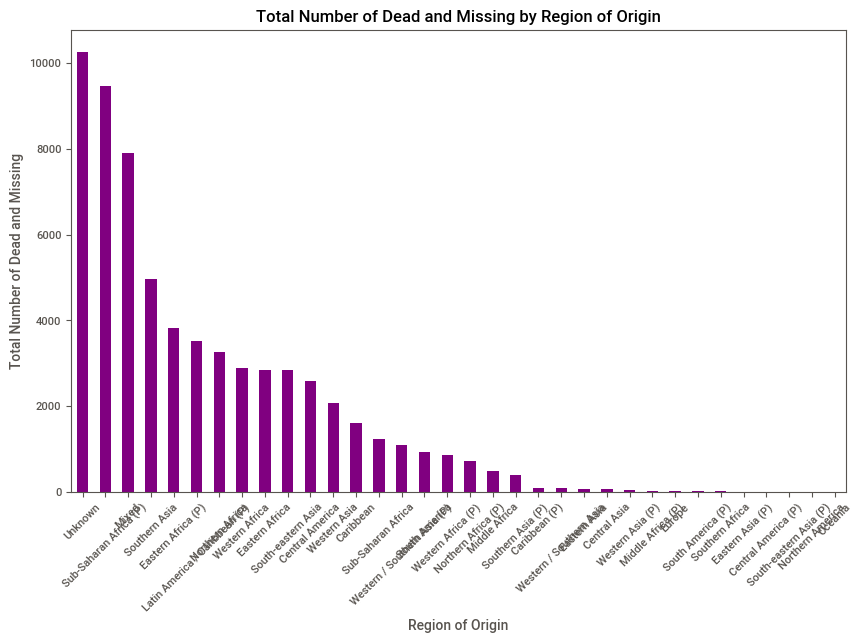

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df_clean = pd.read_csv('data/df_clean.csv')

# Group by 'Region of Origin' and sum the 'Total Number of Dead and Missing' for each region
region_incidents = df_clean.groupby('Region of Origin')['Total Number of Dead and Missing'].sum().sort_values(ascending=False)

# Plot the data
region_incidents.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Total Number of Dead and Missing by Region of Origin')
plt.xlabel('Region of Origin')
plt.ylabel('Total Number of Dead and Missing')
plt.xticks(rotation=45)
plt.show()


- Mediterranean and Northern Africa Regions seems to have the highest Number of Dead Migrants. 

*Migration route analysis*

In [22]:
variables_of_interest = [
    'Number of Dead',
    'Total Number of Dead and Missing',
    'Number of Males'
]
frequency_distributions = {}

for variable in variables_of_interest:
    distribution = df_clean.groupby('UNSD Geographical Grouping')[variable].sum().sort_values(ascending=False)
    frequency_distributions[variable] = distribution

# To display the frequency distributions, you can print them or save them to a CSV file
for variable, distribution in frequency_distributions.items():
    print(f"\nDistribution for {variable}:\n", distribution)
    


Distribution for Number of Dead:
 UNSD Geographical Grouping
Uncategorized         12445.0
Northern Africa        5460.0
Northern America       4224.0
Southern Asia          3273.0
Central America        2424.0
Western Africa         2320.0
Western Asia           2123.0
Eastern Africa         1527.0
South-eastern Asia     1288.0
Southern Europe         481.0
South America           416.0
Caribbean               378.0
Western Europe          265.0
Eastern Europe          215.0
Middle Africa           207.0
Northern Europe          69.0
Southern Africa          59.0
Central Asia             53.0
Eastern Asia             48.0
Name: Number of Dead, dtype: float64

Distribution for Total Number of Dead and Missing:
 UNSD Geographical Grouping
Uncategorized         35022
Northern Africa        6059
Northern America       4293
Southern Asia          3280
South-eastern Asia     3073
Western Africa         2720
Central America        2690
Western Asia           2183
Eastern Africa         1808

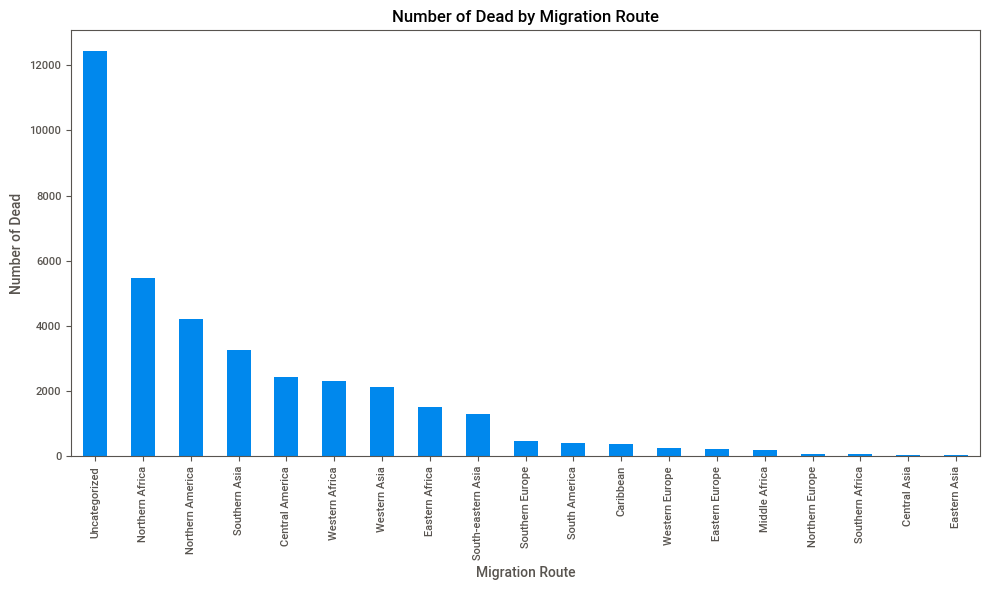

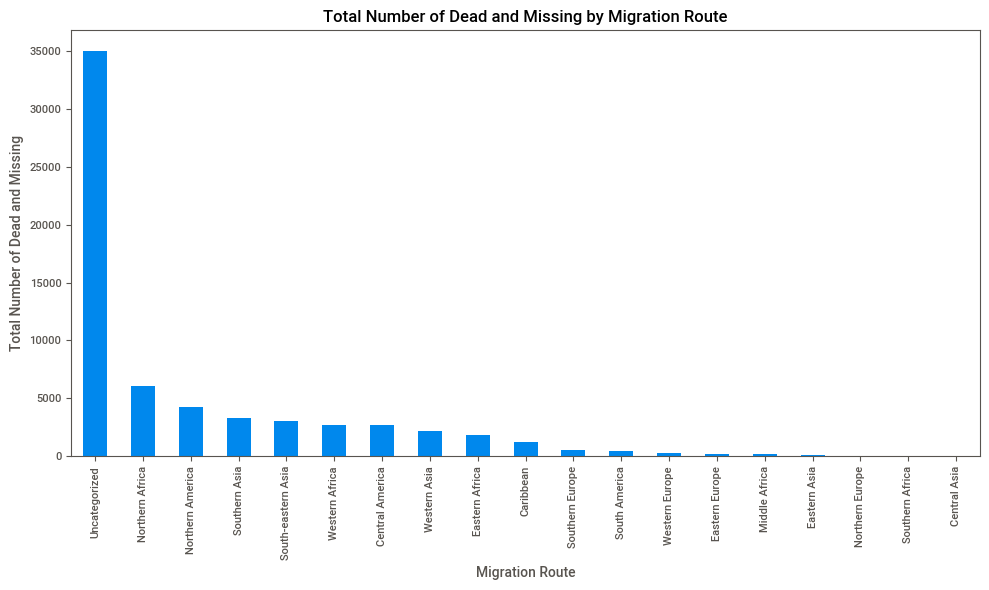

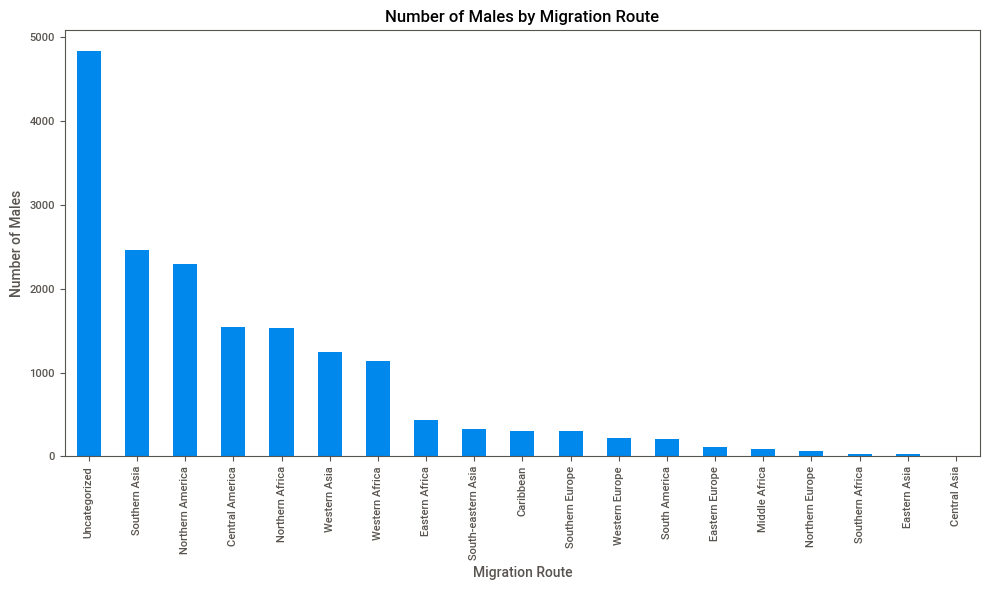

In [23]:
import matplotlib.pyplot as plt

# Loop over each variable and create a bar plot
for variable, distribution in frequency_distributions.items():
    plt.figure(figsize=(10, 6))  # Adjust the size as necessary
    distribution.plot(kind='bar')
    plt.title(f'{variable} by Migration Route')
    plt.xlabel('Migration Route')
    plt.ylabel(variable)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if necessary
    plt.tight_layout()  # Adjust layout to fit everything nicely
    plt.show()

- Most frequent deaths happen on Migration Routes in Northern Africa, Northern America, Southern Asia and South-Eastern Asia 

### 2.2.4 Cause of Death 

*Most Frequent Causes of Death Plot*

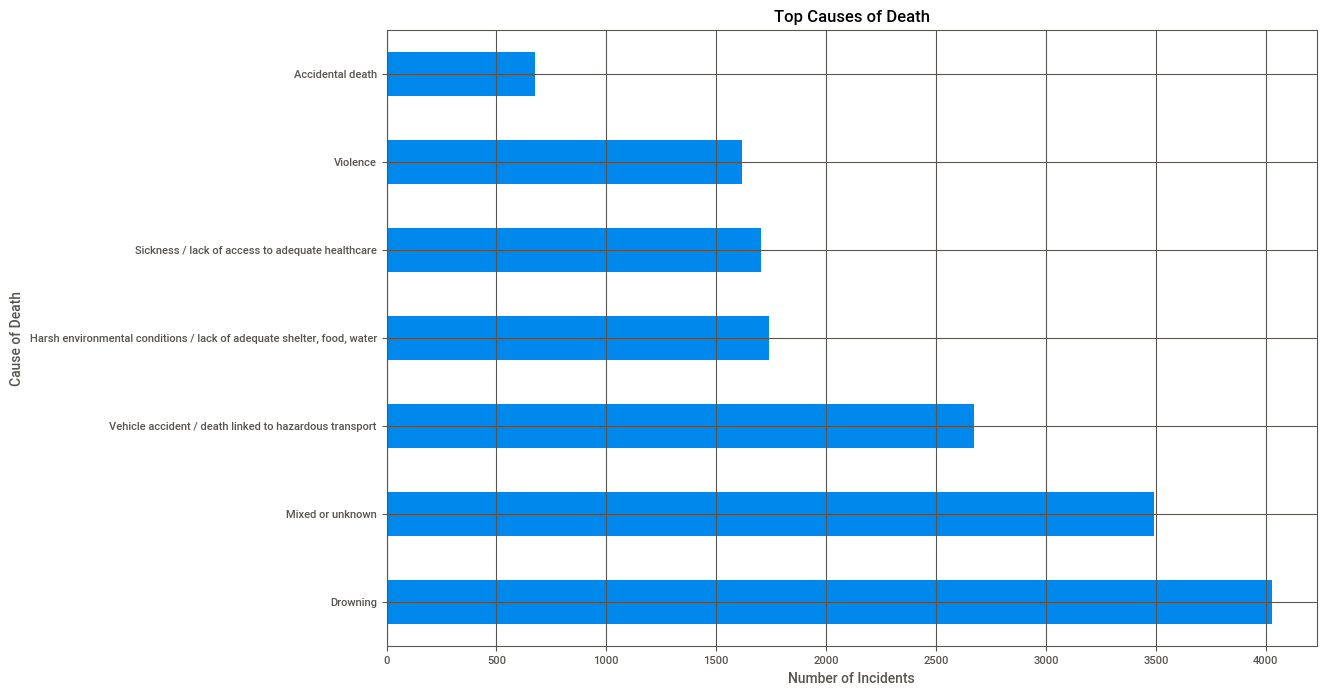

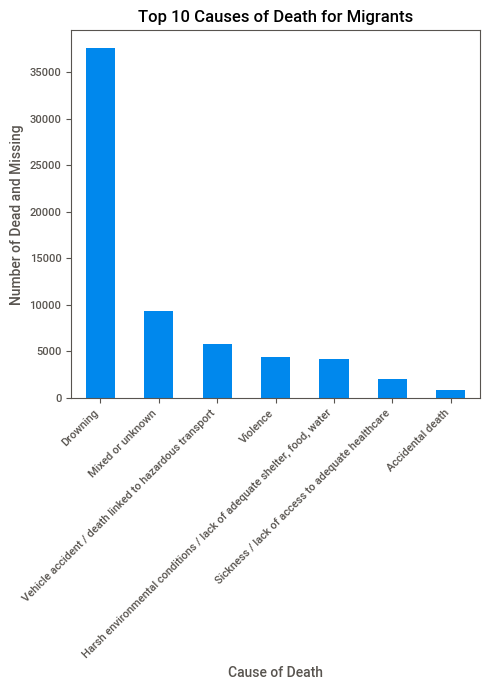

In [24]:
cause_of_death_counts = df_clean['Cause of Death'].value_counts().head(10)

plt.figure(figsize=(12, 8))
cause_of_death_counts.plot(kind='barh')
plt.title('Top Causes of Death')
plt.xlabel('Number of Incidents')
plt.ylabel('Cause of Death')
plt.grid(True)
plt.show()

# Further breakdown of causes of death
df_causes = df_clean.groupby('Cause of Death')['Total Number of Dead and Missing'].sum().sort_values(ascending=False)
df_causes.head(10).plot(kind='bar', figsize=(5, 7))  # Top 10 causes of death
plt.title('Top 10 Causes of Death for Migrants')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Dead and Missing')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

*Cross-analysis of regions and causes of death using Normalized Cross Tabulation*

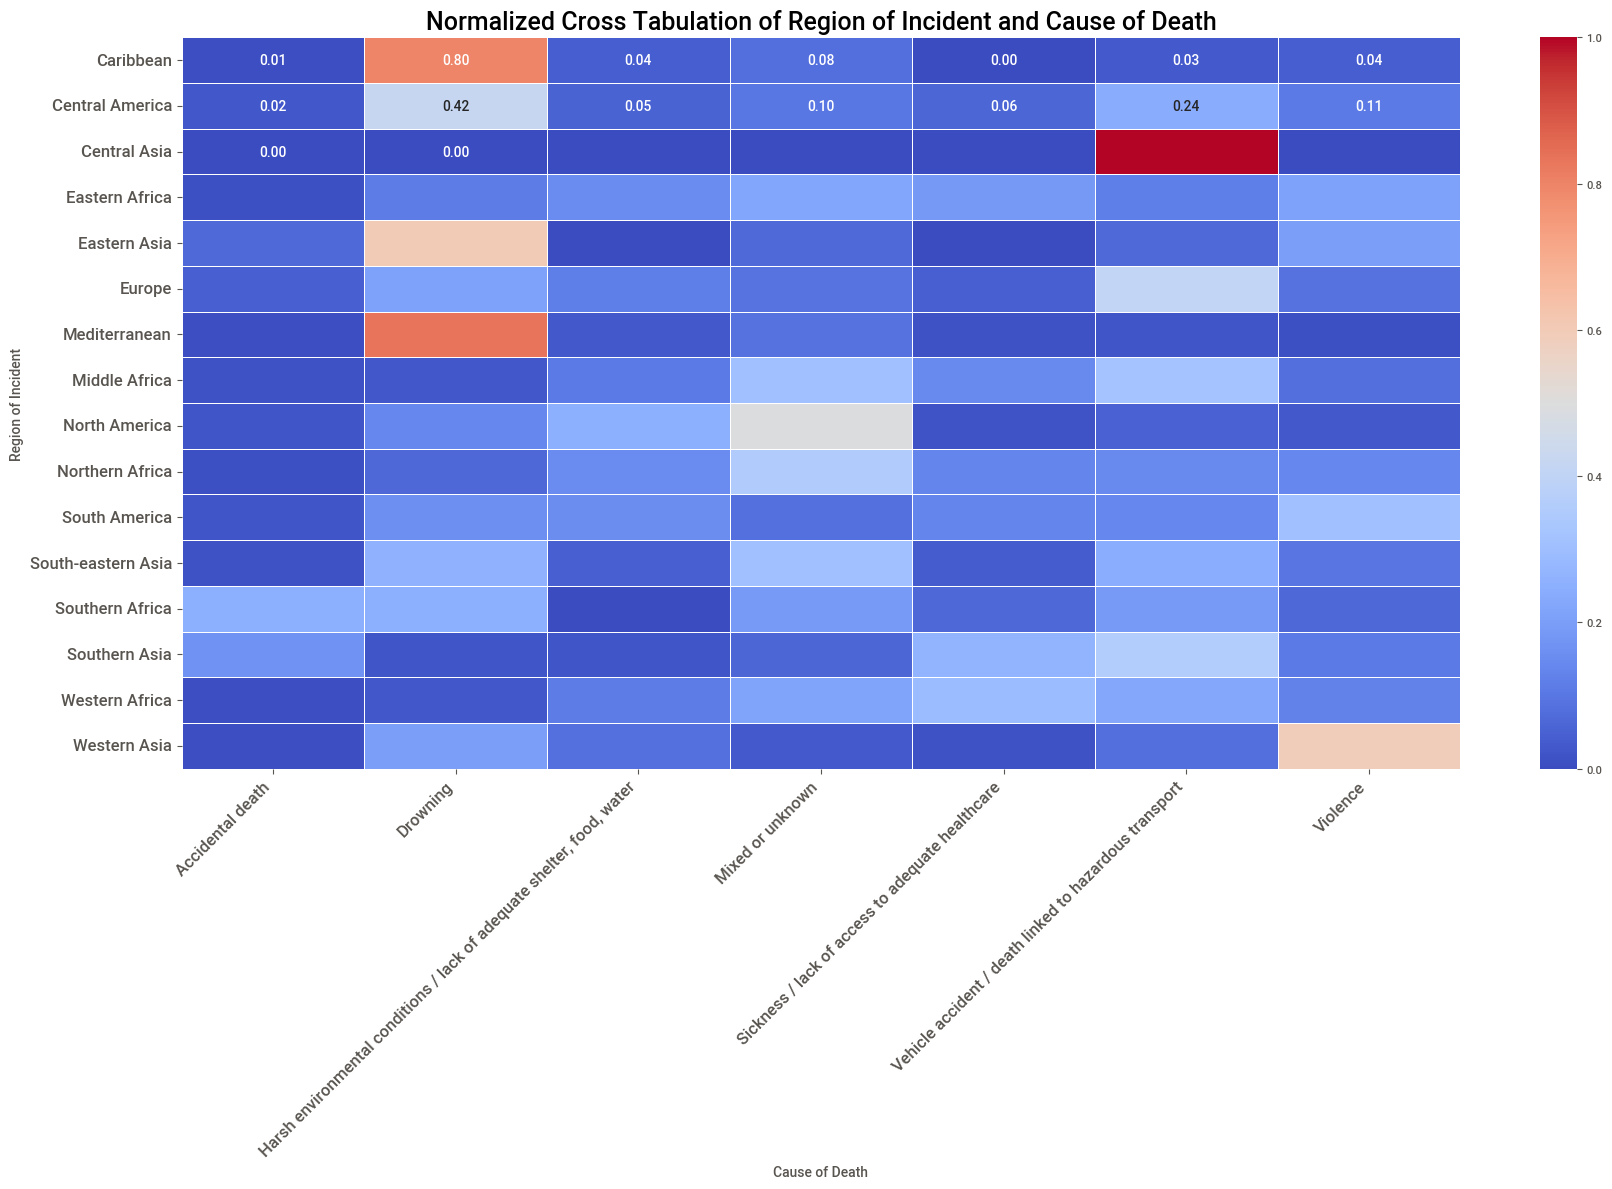

In [25]:
# Normalize by row
cross_tab_region_cause = pd.crosstab(df_clean['Region of Incident'], df_clean['Cause of Death'])
cross_tab_region_cause = cross_tab_region_cause.div(cross_tab_region_cause.sum(axis=1), axis=0)

# Set a larger figure size
plt.figure(figsize=(18, 12))

# Create the heatmap using Seaborn
ax = sns.heatmap(cross_tab_region_cause, cmap='coolwarm', linewidths=.5, annot=True, fmt=".2f")

# Set larger font sizes for readability
plt.title('Normalized Cross Tabulation of Region of Incident and Cause of Death', fontsize=18)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Use tight_layout to adjust the plotting area
plt.tight_layout()

# Show the plot
plt.show()

- In Central Aia and Europe most frequently death happen due to Vehicle accidents / Hazardous Transport
- In Carribean, Central America, Eastern Asia, Mediterranean and Europe a common reason for death is Drowning
- In Western Asia and South America with a milder correlation a reason for death is Violence

*Analysing the reasons of death in specific geographical parts of Europe*

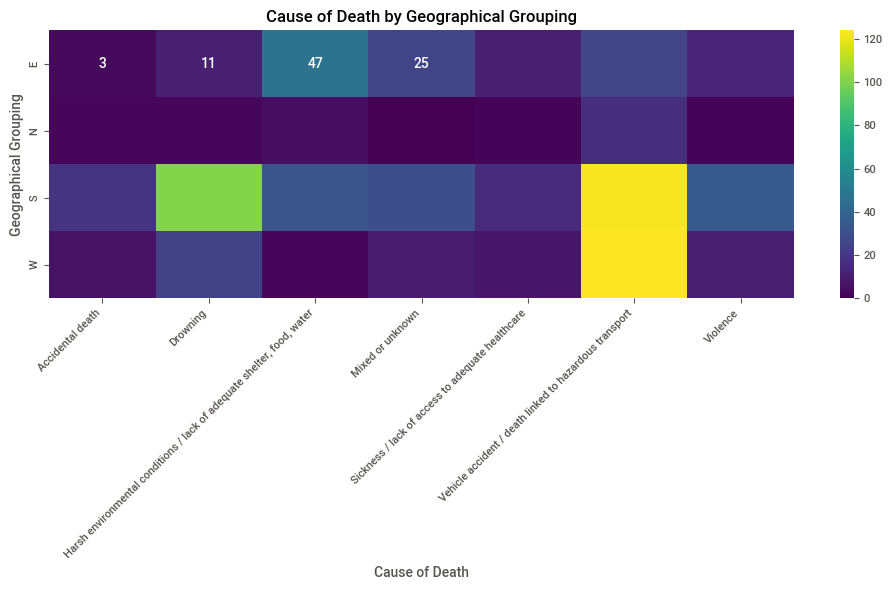

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_raw is your DataFrame with "UNSD Geographical Grouping" and "Cause of Death" columns

# Filter the DataFrame to include only specified geographical groupings
selected_groupings = ['Western Europe', 'Northern Europe', 'Eastern Europe', 'Southern Europe']
filtered_df = df_raw[df_raw['UNSD Geographical Grouping'].isin(selected_groupings)]

# Create a DataFrame with the count of each cause of death per country
histogram_data = filtered_df.groupby(['UNSD Geographical Grouping', 'Cause of Death']).size().unstack(fill_value=0)

# Rename the index and columns
histogram_data = histogram_data.rename(index={'Western Europe': 'W', 'Northern Europe': 'N', 'Eastern Europe': 'E', 'Southern Europe': 'S'})

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(histogram_data, cmap='viridis', annot=True, fmt='d', cbar=True, xticklabels=histogram_data.columns, yticklabels=histogram_data.index)
plt.title('Cause of Death by Geographical Grouping')
plt.xlabel('Cause of Death')
plt.ylabel('Geographical Grouping')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- In Southern Europe the most frequent reasons of death are Drowning and Vehicle accidents
- In Western Europe the most frequents reasons of death are Vehicle accidents
- In Eastern Europe Harsh environmental conditions are the cause of deaths

### 2.2.5 Seasonality

*Plotting the Incidents Year and Total Number of Dead and Missing Immigrants*

Text(0, 0.5, 'Total Number of Dead and Missing')

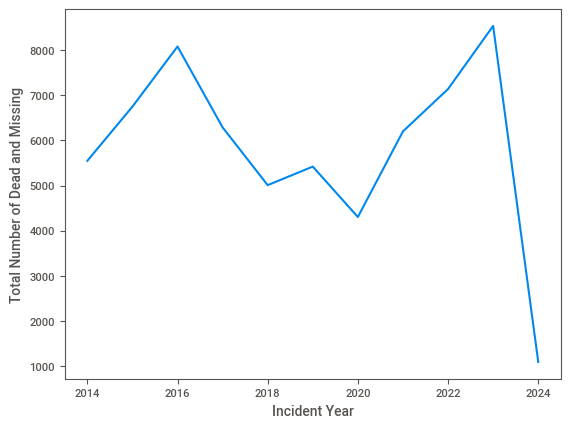

In [27]:
df_clean.groupby('Incident Year')['Total Number of Dead and Missing'].sum().plot()
plt.ylabel('Total Number of Dead and Missing')

- Most of the incidents happened in 2016, 2021, 2022 and 2023

*Monthly incidents analysis*

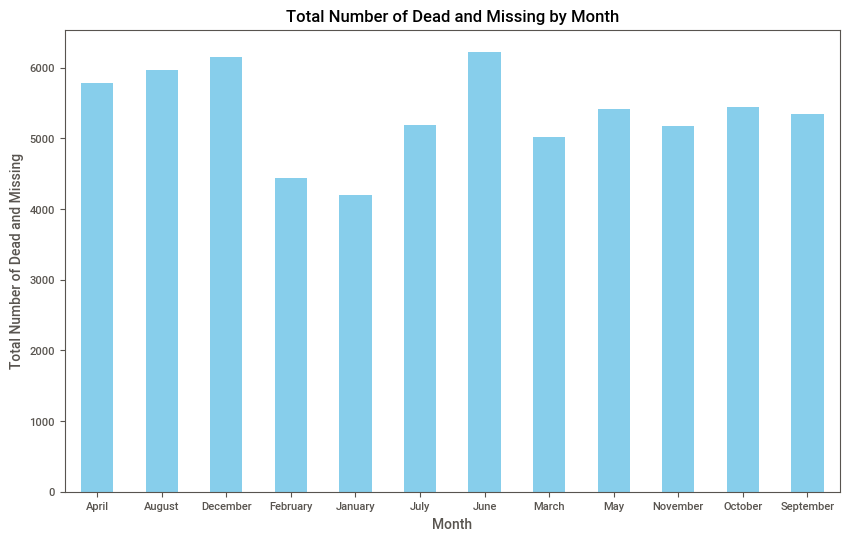

In [28]:
monthly_incidents = df_clean.groupby('Month')['Total Number of Dead and Missing'].sum()
monthly_incidents.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Number of Dead and Missing by Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Dead and Missing')
plt.xticks(rotation=0)
plt.show()

- Most Death Incidents are observed in April, August, December and June

### 2.3 Clustering

   Number of Dead sum  Total Number of Dead and Missing sum
0           -0.490922                             -0.395884
1            2.251418                              0.812783
2            3.159207                              4.605875
3            0.728256                              0.167595
4            0.069654                              0.318390


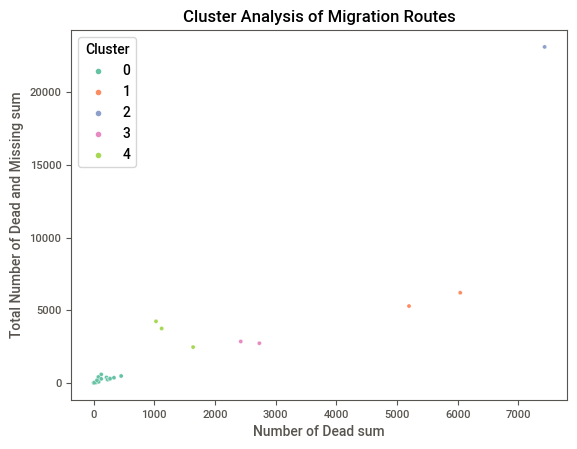

In [29]:
from sklearn.cluster import KMeans
import seaborn as sns

# Data Preparation: Aggregate the data to create features for each route
route_features = df_clean.groupby('Migration Route').agg({
    'Number of Dead': ['sum', 'mean'],
    'Total Number of Dead and Missing': ['sum', 'mean'],
    # Add more features as needed
}).reset_index()

# Flatten the column names
route_features.columns = [' '.join(col).strip() for col in route_features.columns.values]

# Feature Selection: Select relevant numerical features for clustering
X = route_features[['Number of Dead sum', 'Total Number of Dead and Missing sum']]
# Normalize the features - very important for clustering
X = (X - X.mean()) / X.std()

# Clustering: Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
route_features['Cluster'] = kmeans.fit_predict(X)

# Analyze Clusters: Check the central values of each cluster
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(cluster_centers)

# Visualize the clusters
sns.scatterplot(data=route_features, x='Number of Dead sum', y='Total Number of Dead and Missing sum', hue='Cluster', palette='Set2')
plt.title('Cluster Analysis of Migration Routes')
plt.show()

# You might want to attach the cluster labels back to the original dataframe
df_clean = df_clean.merge(route_features[['Migration Route', 'Cluster']], on='Migration Route', how='left')

In [30]:
df_clean.head(10)

,Main ID,Incident ID,Incident Type,Region of Incident,Incident Date,Incident Year,Month,Number of Dead,Total Number of Dead and Missing,Number of Males,...,Migration Route,Location of Incident,Coordinates,UNSD Geographical Grouping,Information Source,URL,Source Quality,lat,lon,Cluster
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,1,1.0,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"31.650259, -110.366453",Northern America,Pima County Office of the Medical Examiner (PC...,http://humaneborders.info/,5,31.650259,-110.366453,1.0
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,1,NaN,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"31.59713, -111.73756",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5,31.597130,-111.737560,1.0
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,1,NaN,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"31.94026, -113.01125",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5,31.940260,-113.011250,1.0
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,1,1.0,...,US-Mexico border crossing,"near Douglas, Arizona, USA","31.506777, -109.315632",Northern America,"Ministry of Foreign Affairs Mexico, Pima Count...",http://bit.ly/1qfIw00,5,31.506777,-109.315632,1.0
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,1,1.0,...,NaN,Border between Russia and Estonia,"59.1551, 28",Northern Europe,EUBusiness (Agence France-Presse),http://bit.ly/1rTFTjR,1,59.155100,28.000000,NaN
5,2014.MMP00006,2014.MMP00006,Incident,North America,2014-01-17,2014,January,1.0,1,NaN,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"32.45435, -113.18402",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5,32.454350,-113.184020,1.0
6,2014.MMP00007,2014.MMP00007,Incident,Mediterranean,2014-01-19,2014,January,12.0,12,NaN,...,Eastern Mediterranean,Waters near Greece while being towed back to T...,"37.2832, 27",Uncategorized,European Council on Refugees and Exiles,http://bit.ly/2aMCwfg,5,37.283200,27.000000,4.0
7,2014.MMP00008,2014.MMP00008,Incident,North America,2014-01-22,2014,January,1.0,1,NaN,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"32.478317, -113.182833",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5,32.478317,-113.182833,1.0
8,2014.MMP00009,2014.MMP00009,Incident,North America,2014-01-24,2014,January,1.0,1,NaN,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"31.81154, -111.01101",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5,31.811540,-111.011010,1.0
9,2014.MMP00010,2014.MMP00010,Incident,North America,2014-01-24,2014,January,1.0,1,NaN,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,"32.174017, -112.174583",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5,32.174017,-112.174583,1.0


In [31]:
# Identifying routes in Cluster 2
outlier_routes = route_features[route_features['Cluster'] == 2]['Migration Route']

# Displaying the routes in Cluster 2
print("Routes in Cluster 2 with the highest number of incidents:")
print(outlier_routes.to_list())

# Optionally, save the routes for further analysis
outlier_routes.to_csv('data/outlier_routes.csv', index=False)

# To perform a detailed qualitative analysis, you might look at each route in detail
# For example:
for route in outlier_routes:
    route_data = df_clean[df_clean['Migration Route'] == route]
    print(f"Analysis for {route}:")
    # Add any specific analysis you wish to perform, like summary statistics, etc.
    print(route_data.describe())
    # Include more detailed analysis as required

Routes in Cluster 2 with the highest number of incidents:
['Central Mediterranean']
Analysis for Central Mediterranean:
       Incident Year  Number of Dead  Total Number of Dead and Missing  \
count    1377.000000     1112.000000                       1377.000000   
mean     2019.700073        6.684353                         16.774873   
std         2.897113       26.477717                         51.076082   
min      2014.000000        0.000000                          0.000000   
25%      2017.000000        1.000000                          1.000000   
50%      2020.000000        2.000000                          3.000000   
75%      2022.000000        5.000000                         11.000000   
max      2024.000000      750.000000                       1022.000000   

       Number of Males  Source Quality          lat          lon  Cluster  
count       457.000000     1377.000000  1377.000000  1377.000000   1377.0  
mean          5.881838        3.755265    33.937813    13.621

In [32]:
# Group by 'Cluster' and get summary statistics for each cluster
cluster_summary = route_features.groupby('Cluster').agg({
    'Number of Dead sum': ['mean', 'std', 'min', 'max'],
    'Total Number of Dead and Missing sum': ['mean', 'std', 'min', 'max'],
    # Add other aggregated functions as necessary
}).reset_index()

# Flatten the MultiIndex for columns
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]

# Print the summary for each cluster
print(cluster_summary)

   Cluster_  Number of Dead sum_mean  Number of Dead sum_std  \
0         0               143.105263              126.232983   
1         1              5620.000000              596.798123   
2         2              7433.000000                     NaN   
3         3              2578.000000              216.374675   
4         4              1262.666667              329.214722   

   Number of Dead sum_min  Number of Dead sum_max  \
0                     1.0                   453.0   
1                  5198.0                  6042.0   
2                  7433.0                  7433.0   
3                  2425.0                  2731.0   
4                  1028.0                  1639.0   

   Total Number of Dead and Missing sum_mean  \
0                                 217.789474   
1                                5747.000000   
2                               23099.000000   
3                                2795.500000   
4                                3485.333333   

   Tota

- Cluster 0: This cluster has the lowest average number of dead and missing migrants, with moderate variation. Routes in this cluster might be considered lower risk compared to others.

- Cluster 1: This cluster has a high average with a relatively small standard deviation, indicating routes with consistently high numbers of dead and missing migrants. It suggests these routes are uniformly dangerous.

- Cluster 2: This cluster contains a single route, the Central Mediterranean, with the highest total number of dead and missing. It's an extreme outlier, highlighting the exceptional risk associated with this route.

- Cluster 3: This cluster shows routes with a moderate average number of dead and missing but less variation, suggesting somewhat consistent risk across the routes.

- Cluster 4: Routes in this cluster have a high average number of dead and missing and low variation, indicating these are also consistently high-risk routes, though not as extreme as Cluster 2.

*With this characterization, we can provide more tailored recommendations for each cluster:*

- For lower-risk clusters (like Cluster 0): Investigate what makes these routes safer. Is it due to better search and rescue efforts, geographical features, or less treacherous paths? This information can be used to improve safety measures on more dangerous routes.

- For higher-risk clusters (like Clusters 1, 3, and 4): Look into specific interventions for these routes. This could involve international cooperation, awareness campaigns, and possibly looking into the root causes prompting the use of these dangerous routes.

- For outlier routes (Cluster 2): Since the Central Mediterranean route is extremely high-risk, focusing on this area could be critical. Initiatives might include international search and rescue operations, agreements with countries along the route, and developing safer legal pathways for migration.

In [33]:
import matplotlib.pyplot as plt

# We need to ensure our 'Incident Date' is in datetime format
df_clean['Incident Date'] = pd.to_datetime(df_clean['Incident Date'])

# Merge the cluster information back into the original dataframe for temporal analysis
df_clustered = df_clean.merge(route_features[['Migration Route', 'Cluster']], on='Migration Route', how='left')

df_clustered.head(10)

,Main ID,Incident ID,Incident Type,Region of Incident,Incident Date,Incident Year,Month,Number of Dead,Total Number of Dead and Missing,Number of Males,...,Location of Incident,Coordinates,UNSD Geographical Grouping,Information Source,URL,Source Quality,lat,lon,Cluster_x,Cluster_y
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,1,1.0,...,Pima Country Office of the Medical Examiner ju...,"31.650259, -110.366453",Northern America,Pima County Office of the Medical Examiner (PC...,http://humaneborders.info/,5,31.650259,-110.366453,1.0,1.0
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,1,NaN,...,Pima Country Office of the Medical Examiner ju...,"31.59713, -111.73756",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5,31.597130,-111.737560,1.0,1.0
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,1,NaN,...,Pima Country Office of the Medical Examiner ju...,"31.94026, -113.01125",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5,31.940260,-113.011250,1.0,1.0
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,1,1.0,...,"near Douglas, Arizona, USA","31.506777, -109.315632",Northern America,"Ministry of Foreign Affairs Mexico, Pima Count...",http://bit.ly/1qfIw00,5,31.506777,-109.315632,1.0,1.0
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,1,1.0,...,Border between Russia and Estonia,"59.1551, 28",Northern Europe,EUBusiness (Agence France-Presse),http://bit.ly/1rTFTjR,1,59.155100,28.000000,NaN,NaN
5,2014.MMP00006,2014.MMP00006,Incident,North America,2014-01-17,2014,January,1.0,1,NaN,...,Pima Country Office of the Medical Examiner ju...,"32.45435, -113.18402",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5,32.454350,-113.184020,1.0,1.0
6,2014.MMP00007,2014.MMP00007,Incident,Mediterranean,2014-01-19,2014,January,12.0,12,NaN,...,Waters near Greece while being towed back to T...,"37.2832, 27",Uncategorized,European Council on Refugees and Exiles,http://bit.ly/2aMCwfg,5,37.283200,27.000000,4.0,4.0
7,2014.MMP00008,2014.MMP00008,Incident,North America,2014-01-22,2014,January,1.0,1,NaN,...,Pima Country Office of the Medical Examiner ju...,"32.478317, -113.182833",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5,32.478317,-113.182833,1.0,1.0
8,2014.MMP00009,2014.MMP00009,Incident,North America,2014-01-24,2014,January,1.0,1,NaN,...,Pima Country Office of the Medical Examiner ju...,"31.81154, -111.01101",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5,31.811540,-111.011010,1.0,1.0
9,2014.MMP00010,2014.MMP00010,Incident,North America,2014-01-24,2014,January,1.0,1,NaN,...,Pima Country Office of the Medical Examiner ju...,"32.174017, -112.174583",Northern America,Pima County Office of the Medical Examiner (PC...,NaN,5,32.174017,-112.174583,1.0,1.0


In [34]:
import plotly.express as px

# Plotting
fig = px.line(df_clustered, x='Incident Date', y='Total Number of Dead and Missing', color='Cluster_x',
              labels={'Incident Date': 'Incident Date', 'Total Number of Dead and Missing': 'Total Dead and Missing Migrants', 'Cluster_x': 'Cluster'},
              title='Trend of Total Number of Dead and Missing Migrants by Cluster')

# Adjusting the size of the plot
fig.update_layout(
    width=1000,  # Set the width of the plot
    height=600,  # Set the height of the plot
    xaxis_title='Incident Date',
    yaxis_title='Total Dead and Missing Migrants',
    legend_title='Cluster'
)

fig.show()

# 3.1 Feature Engineering 

## 3.1.1 Adding New Variables

### Conflicts countries faced between 2014 and 2023

In [35]:
df = pd.read_csv('data/countries-in-conflict-data.csv', header=0)

print(df)

        Entity      Code  Year  \
0     Abkhazia  OWID_ABK  1989   
1     Abkhazia  OWID_ABK  1990   
2     Abkhazia  OWID_ABK  1991   
3     Abkhazia  OWID_ABK  1992   
4     Abkhazia  OWID_ABK  1993   
...        ...       ...   ...   
6965  Zimbabwe       ZWE  2018   
6966  Zimbabwe       ZWE  2019   
6967  Zimbabwe       ZWE  2020   
6968  Zimbabwe       ZWE  2021   
6969  Zimbabwe       ZWE  2022   

      Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all  
0                                                     0                              
1                                                     0                              
2                                                     0                              
3                                                     0                              
4                                                     0                              
...                                                 ...                    

In [36]:
filtered_data = df[(df['Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all'] != 0) &
                   (df['Year'].between(2014, 2023))]

print(filtered_data)

           Entity Code  Year  \
59    Afghanistan  AFG  2014   
60    Afghanistan  AFG  2015   
61    Afghanistan  AFG  2016   
62    Afghanistan  AFG  2017   
63    Afghanistan  AFG  2018   
...           ...  ...   ...   
6829        Yemen  YEM  2018   
6830        Yemen  YEM  2019   
6831        Yemen  YEM  2020   
6832        Yemen  YEM  2021   
6833        Yemen  YEM  2022   

      Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all  
59                                                12499                              
60                                                17926                              
61                                                18674                              
62                                                19741                              
63                                                26822                              
...                                                 ...                              
6829         

In [37]:
filtered_data.to_csv('data/filtered_data.csv', index=False)

In [39]:
# Assuming 'column_name' is the name of your column
split_by_countries = df_clean.copy()
split_by_countries = df_clean['Country of Origin'].str.split(',', expand=True)
split_by_countries.columns = ['Country of Origin ' + str(col + 1) for col in split_by_countries.columns]
split_by_countries = split_by_countries.replace('unknown', np.nan)

# Reset the index to use the index as an identifier for melting
split_by_countries.reset_index(inplace=True)

# Melt the DataFrame
melted_df = split_by_countries.melt(id_vars='index', value_vars=split_by_countries.columns[1:], value_name='Country of Origin')

# Remove NaN values
melted_df = melted_df.dropna(subset=['Country of Origin'])

# Merge with the original DataFrame to get the other columns
final_df = pd.merge(df_clean, melted_df, left_index=True, right_on='index')

# Drop unnecessary columns
split_by_countries = final_df.drop(['index', 'variable'], axis=1)

# Getting the country code for country or origin
!pip install pycountry
import pycountry
def country_to_code(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except AttributeError:
        return np.nan

split_by_countries['Country of Origin Code'] = split_by_countries['Country of Origin_y'].apply(country_to_code)

- Splitting the 'Country of Origin' column into multiple columns, melting the DataFrame to stack the country columns into a single column, merging the melted DataFrame with the original DataFrame, dropping unnecessary columns, and obtaining country codes for each country of origin.

### Labor Force

In [40]:
labor_force = pd.read_csv('new_data/labor_force/API_SL.TLF.TOTL.IN_DS2_en_csv_v2_44893.csv', delimiter=',', skiprows=3)

In [41]:
cols_to_drop = labor_force.columns[2:-11]
labor_force = labor_force.drop(cols_to_drop, axis=1)
labor_force = labor_force.drop(labor_force.columns[-1], axis=1)

labor_force

,Country Name,Country Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,233827863.0,241468428.0,248638349.0,255956115.0,263150918.0,270995141.0,276110533.0,285907674.0,295773409.0,305241775.0
2,Afghanistan,AFG,8285362.0,8630724.0,8913938.0,9254593.0,9242721.0,9220323.0,9105733.0,9356574.0,8803873.0,8920521.0
3,Africa Western and Central,AFW,138886182.0,142375596.0,146463779.0,149976582.0,154203991.0,158547164.0,161605111.0,166806489.0,173133251.0,178686576.0
4,Angola,AGO,11251540.0,11623549.0,12011479.0,12415650.0,12825924.0,13246117.0,13728470.0,14445598.0,14746279.0,15222540.0
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,5882886.0,5273905.0,5483245.0,5692713.0,5898001.0,6104306.0,6237915.0,6334868.0,6663004.0,6882832.0
263,South Africa,ZAF,21981198.0,23120551.0,23430091.0,23776332.0,23771537.0,24142655.0,22920638.0,23621462.0,24366735.0,25158403.0
264,Zambia,ZMB,5037575.0,5218288.0,5404433.0,5594492.0,5789287.0,6117559.0,6488754.0,6642413.0,6826898.0,7051257.0


### GDP PPP

In [42]:
gdp = pd.read_csv('new_data/gdp/API_NY.GDP.MKTP.PP.CD_DS2_en_csv_v2_44509.csv', delimiter=',', skiprows=3)

cols_to_drop = labor_force.columns[2:-11]
gdp = labor_force.drop(cols_to_drop, axis=1)
gdp = labor_force.drop(labor_force.columns[-1:-2], axis=1)

gdp

,Country Name,Country Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,233827863.0,241468428.0,248638349.0,255956115.0,263150918.0,270995141.0,276110533.0,285907674.0,295773409.0,305241775.0
2,Afghanistan,AFG,8285362.0,8630724.0,8913938.0,9254593.0,9242721.0,9220323.0,9105733.0,9356574.0,8803873.0,8920521.0
3,Africa Western and Central,AFW,138886182.0,142375596.0,146463779.0,149976582.0,154203991.0,158547164.0,161605111.0,166806489.0,173133251.0,178686576.0
4,Angola,AGO,11251540.0,11623549.0,12011479.0,12415650.0,12825924.0,13246117.0,13728470.0,14445598.0,14746279.0,15222540.0
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,5882886.0,5273905.0,5483245.0,5692713.0,5898001.0,6104306.0,6237915.0,6334868.0,6663004.0,6882832.0
263,South Africa,ZAF,21981198.0,23120551.0,23430091.0,23776332.0,23771537.0,24142655.0,22920638.0,23621462.0,24366735.0,25158403.0
264,Zambia,ZMB,5037575.0,5218288.0,5404433.0,5594492.0,5789287.0,6117559.0,6488754.0,6642413.0,6826898.0,7051257.0


### Literacy Rate 

In [43]:
literacy = pd.read_csv('new_data/literacy/API_SE.ADT.LITR.ZS_DS2_en_csv_v2_43.csv', delimiter=',', skiprows=3)

cols_to_drop = literacy.columns[2:-11]
literacy = literacy.drop(cols_to_drop, axis=1)
literacy = literacy.drop(literacy.columns[-1], axis=1)

literacy

,Country Name,Country Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,97.989998,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,69.834770,70.313423,71.09520,71.009071,71.392616,72.634972,72.785622,72.581161,72.600403,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.266041,NaN,NaN
3,Africa Western and Central,AFW,54.006760,54.818321,55.43792,56.485538,59.568459,59.511719,59.617512,60.034611,60.312698,NaN
4,Angola,AGO,66.030113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.400002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,94.139900,94.367920,NaN,87.046669,NaN,95.022972,NaN,90.001358,NaN,NaN
264,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,87.500000,NaN,NaN,NaN


### Gini

In [44]:
gini = pd.read_csv('new_data/gini/API_SI.POV.GINI_DS2_en_csv_v2_139.csv', delimiter=',', skiprows=3)

cols_to_drop = gini.columns[2:-11]
gini = gini.drop(cols_to_drop, axis=1)
gini = gini.drop(gini.columns[-1], axis=1)

gini

,Country Name,Country Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,27.3,26.5,26.7,29.0,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,ZMB,NaN,55.9,NaN,NaN,NaN,NaN,NaN,NaN,51.5,NaN


### Health Expenditure

In [45]:
health = pd.read_csv('new_data/health_expenditure/API_SH.XPD.CHEX.PC.CD_DS2_en_csv_v2_248.csv', delimiter=',', skiprows=3)

cols_to_drop = health.columns[2:-11]
health = health.drop(cols_to_drop, axis=1)
health = health.drop(health.columns[-1], axis=1)

health

,Country Name,Country Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,101.730324,95.337798,88.460875,92.758892,93.010638,89.055315,80.453251,NaN,NaN,NaN
2,Afghanistan,AFG,60.189579,60.058540,61.486458,66.909218,71.334311,74.234104,80.288051,81.319762,NaN,NaN
3,Africa Western and Central,AFW,80.297353,71.954114,62.631480,59.986524,58.757341,60.397184,64.239800,NaN,NaN,NaN
4,Angola,AGO,130.742340,107.643562,94.106155,112.851471,83.899200,69.379341,50.742622,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,75.416016,63.300209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,547.834412,499.363342,463.344635,536.777222,569.273682,550.480225,489.643585,NaN,NaN,NaN
264,Zambia,ZMB,66.047142,57.990551,55.984695,65.821213,74.597534,67.457771,53.753658,NaN,NaN,NaN


### Political Stability

In [46]:
political = pd.read_csv('new_data/political/API_PV.EST_DS2_en_csv_v2_57438.csv', delimiter=',', skiprows=3)

cols_to_drop = political.columns[2:-11]
political = political.drop(cols_to_drop, axis=1)
political = political.drop(political.columns[-1], axis=1)

political

,Country Name,Country Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,1.164568,1.210240,1.260759,1.313844,1.337276,1.335669,1.371497,1.431547,1.474684,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,-2.411068,-2.562625,-2.662156,-2.794974,-2.753262,-2.652407,-2.702632,-2.518530,-2.550802,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,-0.333232,-0.505386,-0.321580,-0.389135,-0.347751,-0.370095,-0.600726,-0.709369,-0.646241,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,-0.340775,-0.200406,-0.285933,-0.244493,-0.675402,-0.348640,-0.279240,-0.113625,-0.252449,NaN
262,"Yemen, Rep.",YEM,-2.665575,-2.668016,-2.784489,-2.934315,-2.996031,-2.770874,-2.647646,-2.580310,-2.476880,NaN
263,South Africa,ZAF,-0.146389,-0.220545,-0.149085,-0.284804,-0.237622,-0.283250,-0.252888,-0.750981,-0.722118,NaN
264,Zambia,ZMB,0.156212,0.144710,0.132928,0.142043,0.082525,-0.117030,-0.131005,0.052348,0.102314,NaN


### Corruption

In [47]:
corruption = pd.read_csv('new_data/corruption/API_CC.EST_DS2_en_csv_v2_74163.csv', delimiter=',', skiprows=3)

cols_to_drop = corruption.columns[2:-11]
corruption = corruption.drop(cols_to_drop, axis=1)
corruption = corruption.drop(corruption.columns[-1], axis=1)

corruption

,Country Name,Country Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,1.014232,1.248461,1.232735,1.239377,1.207429,1.174703,1.199392,0.801611,0.756785,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,-1.364743,-1.354240,-1.540353,-1.531910,-1.502881,-1.419499,-1.493700,-1.152327,-1.183776,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,-1.457798,-1.427323,-1.483337,-1.444333,-1.199251,-1.058418,-0.938673,-0.651610,-0.601941,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,-0.486074,-0.559606,-0.437756,-0.527442,-0.527982,-0.541139,-0.463044,-0.341269,-0.263795,NaN
262,"Yemen, Rep.",YEM,-1.565298,-1.508081,-1.695552,-1.617752,-1.658366,-1.712633,-1.711415,-1.668239,-1.679558,NaN
263,South Africa,ZAF,-0.124875,-0.070510,0.017409,-0.127465,-0.136328,-0.031052,-0.058960,-0.034114,-0.319765,NaN
264,Zambia,ZMB,-0.347683,-0.368301,-0.426890,-0.567721,-0.678602,-0.673918,-0.733921,-0.759728,-0.529200,NaN


### Migration

In [48]:
migration = pd.read_csv('new_data/migration/API_SM.POP.NETM_DS2_en_csv_v2_217.csv', delimiter=',', skiprows=3)

cols_to_drop = migration.columns[2:-11]
migration = migration.drop(cols_to_drop, axis=1)
migration = migration.drop(migration.columns[-1], axis=1)

migration

,Country Name,Country Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,88.0,177.0,170.0,218.0,367.0,412.0,0.0,501.0,164.0,157.0
1,Africa Eastern and Southern,AFE,-199608.0,394925.0,-864708.0,-343075.0,-366105.0,-187410.0,-48955.0,-179444.0,-274282.0,-271749.0
2,Afghanistan,AFG,255611.0,-281739.0,-90238.0,-47090.0,-47205.0,-8082.0,166821.0,-183672.0,-65846.0,-65846.0
3,Africa Western and Central,AFW,-280418.0,-360393.0,-167286.0,-200823.0,-255888.0,-328552.0,-99761.0,-264802.0,-186109.0,-183333.0
4,Angola,AGO,84532.0,74170.0,91623.0,77733.0,61632.0,58986.0,7557.0,29089.0,-1000.0,-1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,-56637.0,-14819.0,-31383.0,-33495.0,-34137.0,-33469.0,-15050.0,-15050.0,-5000.0,-5000.0
262,"Yemen, Rep.",YEM,-30048.0,-38355.0,-39688.0,-39672.0,-39699.0,-39769.0,-86100.0,-101468.0,-29998.0,-29914.0
263,South Africa,ZAF,290874.0,644996.0,-866101.0,-10681.0,27265.0,22728.0,30852.0,10934.0,58496.0,58496.0
264,Zambia,ZMB,16580.0,16283.0,17285.0,20268.0,18019.0,18019.0,9015.0,9015.0,-5000.0,-5000.0


### Electricity

In [49]:
electicity = pd.read_csv('new_data/electricity/API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_42596.csv', delimiter=',', skiprows=3)

cols_to_drop = electicity.columns[2:-11]
electicity = electicity.drop(cols_to_drop, axis=1)
electicity = electicity.drop(electicity.columns[-1], axis=1)

electicity  

,Country Name,Country Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
1,Africa Eastern and Southern,AFE,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
2,Afghanistan,AFG,89.500000,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000,NaN,NaN
3,Africa Western and Central,AFW,47.647405,46.758948,50.903108,48.787640,51.212863,51.160817,51.734388,54.224187,NaN,NaN
4,Angola,AGO,32.000000,42.000000,41.785034,42.906242,45.290000,45.633881,46.955444,48.223854,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,66.100000,67.414886,68.855865,79.200000,62.000000,72.776573,73.853462,74.877197,NaN,NaN
263,South Africa,ZAF,85.900000,85.300000,83.900000,84.400000,84.700000,85.000000,90.000000,89.300000,NaN,NaN
264,Zambia,ZMB,27.900000,31.100000,35.377220,40.300000,40.229340,43.000000,44.604069,46.685116,NaN,NaN


### CPI

In [50]:
cpi = pd.read_excel('new_data/cpi/CPI2022_GlobalResultsTrends.xlsx', sheet_name='CPI Timeseries 2012 - 2022', skiprows=2)

cpi_score_columns = [col for col in cpi.columns if 'CPI score' in col]
cpi_score_columns.append('Country / Territory')
cpi_score_columns.append('ISO3')

cpi = cpi[cpi_score_columns]

In [51]:
rename_dict = {col: col.split(' ')[-1] for col in cpi.columns}
cpi.rename(columns=rename_dict, inplace=True)
cpi.rename(columns={'ISO3': 'Country Code'}, inplace=True)

cpi

,2022,2021,2020,2019,2018,2017,2016,2015,2014,Territory,Country Code
0,24.0,16.0,19.0,16.0,16.0,15.0,15.0,11.0,12.0,Afghanistan,AFG
1,36.0,35.0,36.0,35.0,36.0,38.0,39.0,36.0,33.0,Albania,ALB
2,67.0,69.0,71.0,71.0,70.0,71.0,66.0,70.0,70.0,United Arab Emirates,ARE
3,33.0,29.0,27.0,26.0,19.0,19.0,18.0,15.0,19.0,Angola,AGO
4,38.0,38.0,42.0,45.0,40.0,39.0,36.0,32.0,34.0,Argentina,ARG
...,...,...,...,...,...,...,...,...,...,...,...
176,14.0,14.0,15.0,16.0,18.0,18.0,17.0,17.0,19.0,Venezuela,VEN
177,42.0,39.0,36.0,37.0,33.0,35.0,33.0,31.0,31.0,Vietnam,VNM
178,13.0,13.0,14.0,13.0,13.0,14.0,13.0,18.0,20.0,Syria,SYR
179,33.0,33.0,33.0,34.0,35.0,37.0,38.0,38.0,38.0,Zambia,ZMB


### Deaths due to Conflicts 

In [52]:
death = pd.read_csv('new_data/death/filtered_data.csv', delimiter=',')

death = death.pivot(index='Entity', columns='Year', values='Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all')
death = death.reset_index()

# Getting the country code for country or origin
import pycountry

def country_to_code(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except AttributeError:
        return np.nan

death['Country Code'] = death['Entity'].apply(country_to_code)

death.drop('Entity', axis=1, inplace=True)

## 3.1.2 Merging 

In [53]:
df_names = ['labor_force', 'gdp', 'literacy', 'gini', 'health', 'political', 'corruption', 'migration', 'electicity', 'cpi', 'death']

# Merge the dataframes
merged_df = split_by_countries.copy()
for df_name in df_names:
    df = globals()[df_name].copy()  # Access the DataFrame by its name
    df.columns = [f"{col}_{df_name}" if col != 'Country Code' else col for col in df.columns]  # Add DataFrame name as suffix to each column
    merged_df = merged_df.merge(df, left_on='Country of Origin Code', right_on='Country Code')
    if 'Country Code_x' in merged_df.columns:
        merged_df.drop('Country Code_x', axis=1, inplace=True)

In [54]:
# Split columns into groups of 10 and print each group
for i in range(0, len(merged_df.columns), 10):
    print(merged_df.columns[i:i+10])

Index(['Main ID', 'Incident ID', 'Incident Type', 'Region of Incident',
       'Incident Date', 'Incident Year', 'Month', 'Number of Dead',
       'Total Number of Dead and Missing', 'Number of Males'],
      dtype='object')
Index(['Country of Origin_x', 'Region of Origin', 'Cause of Death',
       'Country of Incident', 'Migration Route', 'Location of Incident',
       'Coordinates', 'UNSD Geographical Grouping', 'Information Source',
       'URL'],
      dtype='object')
Index(['Source Quality', 'lat', 'lon', 'Cluster', 'Country of Origin_y',
       'Country of Origin Code', 'Country Name_labor_force',
       '2014_labor_force', '2015_labor_force', '2016_labor_force'],
      dtype='object')
Index(['2017_labor_force', '2018_labor_force', '2019_labor_force',
       '2020_labor_force', '2021_labor_force', '2022_labor_force',
       '2023_labor_force', 'Country Name_gdp', 'Country Code_y', '2014_gdp'],
      dtype='object')
Index(['2015_gdp', '2016_gdp', '2017_gdp', '2018_gdp', '2019_gdp'

### Data Imputation and Feature Consolidation for Merged DataFrame

In [55]:
features = ['labor_force', 'gdp', 'literacy', 'gini', 'health', 'political', 'corruption', 'migration', 'electicity', 'cpi', 'death']

for feature in features:
    if f'2023_{feature}' not in merged_df.columns:
        merged_df[f'2023_{feature}'] = merged_df[f'2022_{feature}']
    else:
        # Check if 2022 column has more than 0.8 of NaN values
        if merged_df[f'2022_{feature}'].isna().mean() > 0.8:
            # Duplicate values of 2021 for 2022 and 2023
            merged_df[f'2022_{feature}'] = merged_df[f'2021_{feature}']
            merged_df[f'2023_{feature}'] = merged_df[f'2021_{feature}']
        else:
            # Check if 2023 column has more than 0.8 of NaN values
            if merged_df[f'2023_{feature}'].isna().mean() > 0.8:
                # Duplicate values of 2021 for 2023
                merged_df[f'2023_{feature}'] = merged_df[f'2022_{feature}']

In [56]:
columns_drop = [col for col in merged_df.columns if 'Country of Origin' in col or 'Country Name' in col or 'Country Code' in col]
columns_drop.remove('Country of Origin Code')
columns_drop.append('Territory_cpi')
merged_df.drop(columns_drop, axis=1, inplace=True)

In [57]:
features = ['labor_force', 'gdp', 'literacy', 'gini', 'health', 'political', 'corruption', 'migration', 'electicity', 'cpi', 'death']
years = range(2014, 2024)  # Adjust the range according to your data

for feature in features:
    # Initialize new column with NaN values
    merged_df[feature] = np.nan
    for year in years:
        # Get the mask where 'Incident Year' is equal to the current year
        mask = merged_df['Incident Year'] == year
        if f'{year}_{feature}' not in merged_df.columns:
            continue
        else:
            # Update the new column with the values from the corresponding year-feature column
            merged_df.loc[mask, feature] = merged_df.loc[mask, f'{year}_{feature}']

In [58]:
col_to_drop = merged_df.columns[21:-11]
col_to_drop
# merged_df.drop(col_to_drop, axis=1, inplace=True)

Index(['lon', 'Cluster', 'Country of Origin Code', '2014_labor_force',
       '2015_labor_force', '2016_labor_force', '2017_labor_force',
       '2018_labor_force', '2019_labor_force', '2020_labor_force',
       ...
       '2015_death', '2016_death', '2017_death', '2018_death', '2019_death',
       '2020_death', '2021_death', '2022_death', '2023_cpi', '2023_death'],
      dtype='object', length=113)

In [59]:
merged_df.columns

Index(['Main ID', 'Incident ID', 'Incident Type', 'Region of Incident',
       'Incident Date', 'Incident Year', 'Month', 'Number of Dead',
       'Total Number of Dead and Missing', 'Number of Males',
       ...
       'gdp', 'literacy', 'gini', 'health', 'political', 'corruption',
       'migration', 'electicity', 'cpi', 'death'],
      dtype='object', length=145)

## 3.1.3 NaN Ratio Analysis for the Merged DataFrame

In [60]:
nan_ratio = merged_df.isna().mean()
print(nan_ratio.sort_values(ascending=False))

2023_gini         0.898027
2021_gini         0.898027
2022_gini         0.898027
2019_literacy     0.868991
2019_gini         0.868714
                    ...   
2021_political    0.000000
2020_political    0.000000
2019_political    0.000000
2018_political    0.000000
Main ID           0.000000
Length: 145, dtype: float64


## 3.2 Exporting the Final Dataset

In [61]:
merged_df.to_csv('data/merged_df.csv', index=False)

- Exporting the Merged DataFrame to a CSV file

In [63]:
df = pd.read_csv('data/merged_df.csv')

## 3.3 Mapping the Countries 

In [64]:
df_location = pd.DataFrame(df['Location of Incident'])
# Function to extract country name
def extract_country(location):
    places = GeoText(location)
    # Get countries as a list, could be more than one country mentioned
    countries = places.countries
    # Join all found countries with ', ' if there's more than one, or just return the single country
    return ', '.join(countries) if countries else "Unknown"

# Apply the function to create a new column
df['Country of Incident'] = df['Location of Incident'].apply(extract_country)

In [65]:
# Create a dictionary from your provided mappings
location_to_country = {
    'Arizona': 'Arizona, USA',
    'Texas': 'Texas, USA',
    'Türkiye': 'Gevaş district, Türkiye',
    'California': 'California, USA',
    'Central Mediterranean': 'Central Mediterranean',
    'Morroco': 'near Oujda, Morroco',
    'Liby': 'Sudanese-Libyan'
}

# Define a function to apply the mapping
def replace_unknown(row):
    if row['Country of Incident'] == 'Unknown':
        for location, country in location_to_country.items():
            if location in row['Location of Incident']:
                return country
    return row['Country of Incident']
df['Country of Incident'] = df.apply(replace_unknown, axis=1)

In [66]:
df['Country of Incident'].unique()

array(['Arizona, USA', 'Mexico', 'Texas, USA', 'United States', 'Unknown',
       'Mexico, Guatemala', 'California, USA', 'Mexico, Mexico',
       'Libya, Libya', 'United States, United States', 'Canada',
       'Russia, Estonia', 'Sudanese-Libyan', 'France', 'Italy',
       'Libya, Italy', 'United Kingdom, France', 'Greece',
       'Turkey, Greece', 'Libya', 'Israel', 'Egypt', 'Egypt, Israel',
       'Belgium, France', 'Lebanon', 'Malta, Libya', 'Niger, Algeria',
       'Niger', 'Tunisia', 'Niger, Niger', 'Libya, Tunisia', 'Algeria',
       'Italy, Tunisia', 'Greece, Turkey', 'Turkey',
       'Gevaş district, Türkiye', 'Bulgaria, Serbia, Bulgaria',
       'Greece, Italy', 'Macedonia', 'Austria', 'Bulgaria', 'Iran',
       'Croatia', 'Serbia, Bulgaria', 'Serbia', 'Hungary',
       'Bulgaria, Greece', 'Armenia', 'Belgium', 'Italy, Greece',
       'Afghanistan', 'Bulgaria, Serbia, Serbia', 'Poland, Afghanistan',
       'Pakistan, Afghanistan', 'Afghanistan, Iran', 'France, France',
     

In [67]:
for country in df['Country of Incident'].unique():
    print(country)
    print(f"The number of values in the data is: {len(df['Country of Incident'].unique())}")

Arizona, USA
The number of values in the data is: 220
Mexico
The number of values in the data is: 220
Texas, USA
The number of values in the data is: 220
United States
The number of values in the data is: 220
Unknown
The number of values in the data is: 220
Mexico, Guatemala
The number of values in the data is: 220
California, USA
The number of values in the data is: 220
Mexico, Mexico
The number of values in the data is: 220
Libya, Libya
The number of values in the data is: 220
United States, United States
The number of values in the data is: 220
Canada
The number of values in the data is: 220
Russia, Estonia
The number of values in the data is: 220
Sudanese-Libyan
The number of values in the data is: 220
France
The number of values in the data is: 220
Italy
The number of values in the data is: 220
Libya, Italy
The number of values in the data is: 220
United Kingdom, France
The number of values in the data is: 220
Greece
The number of values in the data is: 220
Turkey, Greece
The numb

- By extracting and mapping country information from the location text, the code enhances the dataset's geographical details, providing more precise and standardized information on where migrant incidents occur.

In [68]:
for col in df.columns:
    print(col)
    print(f"The data type of the column is: {df[col].dtype}")
    print(f"The number of missing values in the column is: {df[col].isnull().sum()}")

Main ID
The data type of the column is: object
The number of missing values in the column is: 0
Incident ID
The data type of the column is: object
The number of missing values in the column is: 0
Incident Type
The data type of the column is: object
The number of missing values in the column is: 0
Region of Incident
The data type of the column is: object
The number of missing values in the column is: 0
Incident Date
The data type of the column is: object
The number of missing values in the column is: 6
Incident Year
The data type of the column is: int64
The number of missing values in the column is: 0
Month
The data type of the column is: object
The number of missing values in the column is: 0
Number of Dead
The data type of the column is: float64
The number of missing values in the column is: 443
Total Number of Dead and Missing
The data type of the column is: int64
The number of missing values in the column is: 0
Number of Males
The data type of the column is: float64
The number of mi

- Checking column types to have an appropriate format

## 3.4 Data Type Conversion

In [69]:
df['Incident Year']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
7193    2022
7194    2022
7195    2022
7196    2022
7197    2024
Name: Incident Year, Length: 7198, dtype: int64

In [70]:
df['Incident Year'] = pd.to_datetime(df['Incident Year'], format='%Y')

In [71]:
df['year'] = df['Incident Year'].dt.year
df['month'] = df['Incident Year'].dt.month
df['day'] = df['Incident Year'].dt.day
df['dayofweek'] = df['Incident Year'].dt.dayofweek

df.fillna(method='ffill', inplace=True)

In [ ]:
print(df.columns)

- The code ensures that the 'Incident Year' column is properly formatted as datetime and derives additional temporal features from it. It also handles missing values in the DataFrame by filling them with appropriate values, either through forward filling or using the median for numerical columns. 

In [73]:
# Convert 'Incident Year' datetime to just the year as an integer if not already done
df['Incident Year'] = df['Incident Year'].dt.year

# Ensure 'Country of Incident' is treated as a categorical column
df['Country of Incident'] = df['Country of Incident'].astype('category')

# Convert all other required categorical columns to category data type
categorical_columns = [
    'Incident Type', 'Region of Incident', 'Month', 'Region of Origin',
    'Cause of Death', 'Migration Route', 'Location of Incident',
    'Coordinates', 'UNSD Geographical Grouping', 'Information Source',
    'Country of Origin Code'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

## 3.5 Additional Transformations and Features

### Survival rate
(Total Number of Dead and Missing - Number of Dead) / Total Number of Dead and Missing. Can show the likelihood of surviving an incident.

In [74]:
df['survival_rate'] = (df['Total Number of Dead and Missing'] - df['Number of Dead']) / df['Total Number of Dead and Missing']

In [75]:
df['survival_rate'].unique()

array([ 0.00000000e+00, -1.00000000e+00,  6.00000000e-01,  2.00000000e-01,
        6.66666667e-01,  3.33333333e-01,  8.00000000e-01,  8.88888889e-01,
        3.07692308e-01,  9.94000000e-01,  5.00000000e-01,  2.66144814e-01,
        9.77272727e-01,  1.00000000e+00,  9.00000000e-01,  9.70501475e-01,
        2.91666667e-01,  9.92063492e-01,            -inf,  9.91452991e-01,
        9.89010989e-01,  8.57142857e-01,  7.77777778e-01,  9.90654206e-01,
        7.50000000e-01,  9.33333333e-01, -3.00000000e+00,  8.75000000e-01,
        9.61538462e-01, -5.00000000e-01,  9.23076923e-01,  5.71428571e-01,
        5.38461538e-01, -2.00000000e+00,  1.17647059e-01,  8.09523810e-01,
        2.89473684e-01, -5.75000000e+00,  7.00000000e-01,  2.85714286e-01,
        7.40740741e-01,  6.19047619e-01,  1.11111111e-01,  4.00000000e-01,
        2.50000000e-01,  6.25000000e-01,  4.16666667e-01,  2.17391304e-01,
       -4.00000000e+00,  1.66666667e-01,  1.42857143e-01,  6.15384615e-01,
        9.56521739e-01,  

### Incidents Per Year

In [76]:
incidents_per_year = df.groupby('Incident Year').size().rename('total_incidents')

### Deaths Per Year

In [77]:
deaths_per_year = df.groupby('Incident Year')['Number of Dead'].sum().rename('total_deaths')

### Dead and Missing Migrants Per Year

In [78]:
dead_and_missing_per_year = df.groupby('Incident Year')['Total Number of Dead and Missing'].sum().rename('total_dead_and_missing')

### Yearly Trends

In [79]:
yearly_trends = pd.concat([incidents_per_year, deaths_per_year, dead_and_missing_per_year], axis=1)

In [80]:
yearly_trends = yearly_trends.reset_index()

In [81]:
df = df.merge(yearly_trends, on="Incident Year", how="left")

In [82]:
df.to_csv('final_df.csv', index=False)

## 3.6 Sources
1. https://ourworldindata.org/war-and-peace-data-explorers 
2. https://data.worldbank.org/